In [1]:
list3 = [ 11, 12, 13, 14, 15, 16, 17, 18]
for i in list3:
  print(i)


11
12
13
14
15
16
17
18


파이썬
자료구조 -> 데이타프레임 -> 요약값/시각화 -> 데이타프레임(indexing, slicing) -> sklearn(분석)


데이타 분석 (DA:Data ananalysis)
data -> 전처리 -> EDA(탐색적 데이타 분석) -> Data manipulation -> 모델링 -> 분석 -> 평가

==========

전처리 :
ㅁ missing value 에 대해 어떻게 처리? (na / nan)
 1. 일부가 비면 그냥 해당 row 삭제 
 2. 채우기 

ㅁ 값을 조정
 1. scaling ( 시력과 대출 ) # 시력은 숫자가 작고, 대출은 엄청 큼 => 상대적인 크기로 조정
    min-max scaling / standard scaling 

ㅁ 값을 치환 
  잘못된 값으로 다른 값으로 수정 

ㅁ 파티셔닝 
  행 단위로 전체 데이타를 나눔 (data를 분석 / 검증용으로 나눔)
  data -> 분석 -> 예측 

In [8]:
#creditApprovalUCI.csv를 읽은 후 missing을 찾아보세요
#dropna로 missing행을 지워보세요
#fillna로 missing을 특정값으로 채워보세요

import pandas as pd
df1 = pd.read_csv("./data/creditApprovalUCI.csv")   # DataFrame만들기
df1.info()

df1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      598 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      598 non-null    float64
 8   A9      598 non-null    object 
 9   A10     598 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 86.4+ KB


A1     12
A2     12
A3     92
A4      6
A5      6
A6      9
A7      9
A8     92
A9     92
A10    92
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [9]:
df1.dropna().info()
df1.dropna().shape

df1.dropna(inplace=True) # 원본에 적용

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      564 non-null    object 
 1   A2      564 non-null    float64
 2   A3      564 non-null    float64
 3   A4      564 non-null    object 
 4   A5      564 non-null    object 
 5   A6      564 non-null    object 
 6   A7      564 non-null    object 
 7   A8      564 non-null    float64
 8   A9      564 non-null    object 
 9   A10     564 non-null    object 
 10  A11     564 non-null    int64  
 11  A12     564 non-null    object 
 12  A13     564 non-null    object 
 13  A14     564 non-null    float64
 14  A15     564 non-null    int64  
 15  A16     564 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 74.9+ KB


(564, 16)

In [5]:
df1.fillna("na")

#imputing -> sklearn.preprocessing imputer


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.0,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.5,na,u,g,q,h,na,na,na,0,f,g,280.0,824,1
3,b,27.83,1.54,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,0
686,a,22.67,0.75,u,g,c,v,2.0,f,t,2,t,g,200.0,394,0
687,a,25.25,13.5,y,p,ff,ff,2.0,f,t,1,t,g,200.0,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,0


In [10]:
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,NaN,u,g,q,h,NaN,NaN,NaN,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [11]:
df2 = pd.read_csv("./data/adv.csv")   # DataFrame만들기

In [12]:
df2.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:

a = [0, 0.5, 1]
b = [100000000, 500000000, 0]
# min_max scaling : 값 - 최소 / 최대 - 최소
a1 = [0, 0.5, 1]
b1 = [1, 0.5, 0] 

# standard scaling : 값 - 평균 / 표준편차



In [19]:
# sklearn 값, 평균 => fit  / 값 변환 transform
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()
#scaler.fit()
#scaler.transform()
#result = scaler.fit_transform() # data scaler 결과는 array 


TypeError: TransformerMixin.fit_transform() missing 1 required positional argument: 'X'

In [14]:
#creditset.csv를 crd로 읽어서 minmax scaling을 해보세요
crd = pd.read_csv("./data/creditset.csv")
crd.info()
crd.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   clientid     2000 non-null   int64  
 1   income       2000 non-null   float64
 2   age          2000 non-null   float64
 3   loan         2000 non-null   float64
 4   LTI          2000 non-null   float64
 5   default10yr  2000 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 93.9 KB


(2000, 6)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
result = scaler.fit_transform(crd) # data scaler 결과는 array 
rpd  = pd.DataFrame(result, columns = crd.columns) # array를 dataframe으로 변환
rpd.info()

rpd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   clientid     2000 non-null   float64
 1   income       2000 non-null   float64
 2   age          2000 non-null   float64
 3   loan         2000 non-null   float64
 4   LTI          2000 non-null   float64
 5   default10yr  2000 non-null   float64
dtypes: float64(6)
memory usage: 93.9 KB


,clientid,income,age,loan,LTI,default10yr
0,-1.731185,1.453934,1.364333,1.202819,0.418950,-0.405983
1,-1.729453,-0.762176,0.542268,0.696427,1.603115,-0.405983
2,-1.727721,0.836821,1.672877,1.174711,0.721055,-0.405983
3,-1.725989,-0.183070,0.363887,0.544980,0.772625,-0.405983
4,-1.724257,1.509563,-1.685088,1.420765,0.565684,2.463156


In [22]:
#특정 컬럼만 scaling
result2 = scaler.fit_transform(crd[["income", "age", "loan"]])
rpd2  = pd.DataFrame(result2, columns = ["income", "age", "loan"]) # array를 dataframe으로 변환
rpd2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   income  2000 non-null   float64
 1   age     2000 non-null   float64
 2   loan    2000 non-null   float64
dtypes: float64(3)
memory usage: 47.0 KB


In [26]:
rpd3 = crd [ [ "clientid", "LTI", "default10yr"]]
crd2 = pd.concat([rpd2, rpd3], axis=1) # axis = 1 컬럼방향으로 합치기
crd2

,income,age,loan,clientid,LTI,default10yr
0,1.453934,1.364333,1.202819,1,0.122537,0
1,-0.762176,0.542268,0.696427,2,0.190752,0
2,0.836821,1.672877,1.174711,3,0.139940,0
3,-0.183070,0.363887,0.544980,4,0.142911,0
4,1.509563,-1.685088,1.420765,5,0.130989,1
...,...,...,...,...,...,...
1995,0.969747,0.572514,-0.826907,1996,0.032535,0
1996,1.688540,-1.339834,-0.309130,1997,0.050394,0
1997,-0.071226,-0.973667,0.354201,1998,0.124636,1
1998,-0.110003,1.738021,-0.926756,1999,0.037086,0


In [29]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(crd2, test_size=0.2)
print(train.shape)
print(test.shape)

X_Train, X_test, y_train, y_test = train_test_split(crd2[["age","income"]], crd2["default10yr"], test_size=0.2)

# stratify : 원래 분포를 유지시켜줌 ( 그냥 잘라버리면 한쪽으로 데이타의 특정값이 몰릴 수가 있어서 분포에 맞게)
X_Train, X_test, y_train, y_test = train_test_split(crd2[["age","income"]], crd2["default10yr"], stratify = crd2["default10yr"], test_size=0.2)


(1600, 6)
(400, 6)


In [44]:
# binary.csv 파일을 읽어서 null을 확인해주세요
# gre, gpa를 scaling 해주세요, admit 변수와 합친 데이터프레임 binary2를 만드세요
# binary2를 파티셔님해주세요 (stratify -> admit , 3:1 로 나누세요)

binary = pd.read_csv("data/binary.csv")
#binary.info()
binary.describe()
#binary.isnull().sum()




,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [48]:
sc = MinMaxScaler()
t1 = pd.DataFrame(sc.fit_transform(binary[["gre","gpa"]]), columns=["gre","gpa"] )
t2 = binary["admit"]
binary2 = pd.concat([t1, t2], axis=1)
binary2.head()

,gre,gpa,admit
0,0.275862,0.775862,0
1,0.758621,0.810345,1
2,1.000000,1.000000,1
3,0.724138,0.534483,1
4,0.517241,0.385057,0


In [51]:
x_train, x_test, y_train, y_test = train_test_split(binary2[["gre","gpa"]], binary2["admit"], stratify = binary2["admit"], test_size=0.25) # random_state =1

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 2)
(100, 2)
(300,)
(100,)


코드화 변경
1: 중식 / 2 : 일식 / 3 :양식 / 4 : 한식   -> 값을 치환
dataframe 에서 바로 사용 가능

In [61]:
df1 = pd.read_csv("./data/creditApprovalUCI.csv")   # DataFrame만들기
df1.head()
df1.A1.replace("b", "bb") # 바꿀값, 바뀌어야 할 값,A1 칼럼에서
df1.replace("b", "bb") # 전체에서
df1.replace("[a-z]","@", regex=True) # 정규표현식(regular expression)
#010-1234-5678 패턴



,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,@,30.83,0.000,@,@,@,@,1.25,@,@,1,@,@,202.0,0,1
1,@,58.67,4.460,@,@,@,@,3.04,@,@,6,@,@,43.0,560,1
2,@,24.50,NaN,@,@,@,@,NaN,NaN,NaN,0,@,@,280.0,824,1
3,@,27.83,1.540,@,@,@,@,3.75,@,@,5,@,@,100.0,3,1
4,@,20.17,5.625,@,@,@,@,1.71,@,@,0,@,@,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,@,21.08,10.085,@,@,@,@,1.25,@,@,0,@,@,260.0,0,0
686,@,22.67,0.750,@,@,@,@,2.00,@,@,2,@,@,200.0,394,0
687,@,25.25,13.500,@,@,@@,@@,2.00,@,@,1,@,@,200.0,1,0
688,@,17.92,0.205,@,@,@@,@,0.04,@,@,0,@,@,280.0,750,0


In [65]:
df3 = pd.read_csv("./data/data_3.csv")
# artist 값 중 black을 bbbbb 로 변경
#알파벳 문자를 모두 !로 바꿔보세요

df3.artist.replace("black", "bbbbb")
df3.artist.head(100)
df3.replace("[a-z]","!", regex=True) # 정규표현식(regular expression)


,user,artist,qty
0,1,!!! !!! !!!!! !!!!!!!,1
1,1,!!! !!!!! !!!!!! !!!!!!,1
2,1,!!!!!!!!!,1
3,1,!!!!!!!! !!!!!!!,1
4,1,!! !!!!!,1
...,...,...,...
19994,1312,!!! !!!!!!!!,1
19995,1312,!!!! !!!!!,1
19996,1312,!!! !!!! !!!!!!! !!!!!!!!!!,1
19997,1312,!!!!!,1


In [69]:
# 여러개를 바꿀 때 dictionary를 이용하여 map 하면 replace 됨
df1.A1.value_counts()
dict1 = {'a':'aa', 'b':'bb'}
df1.A1.map(dict1)

0      bb
1      aa
2      aa
3      bb
4      bb
       ..
685    bb
686    aa
687    aa
688    bb
689    bb
Name: A1, Length: 690, dtype: object

In [71]:
# 컬럼 값이 2보다 작으면 "a", 크면 "b"
# 함수를 만들고 DF에 apply 해줌

def func1(input):
    if input > 0:
        return "a"
    return "b"

crd.income.apply(func1)

#전처리 중 피벗도 있음

0       a
1       a
2       a
3       a
4       a
       ..
1995    a
1996    a
1997    a
1998    a
1999    a
Name: income, Length: 2000, dtype: object

In [ ]:
# EDA ( Exploratory Data Analysis)
# E : visualization (통계가 아닌 있는 그대로 보자 , 통계는 너무 엄격하다)
# data를 요약, 그림으로 보고 (boxplot / histogram : 수치형 변수 / barplot : 범주형 변수/ )
# 히스토그램 (막대기 : bin - 넒게 잡으면 러프/ 좁게 잡으면 세밀)
# barplot : value count, 상자안에 선은 중앙 값, 위아래 선은 상하위 25% 분포
# 히스토그램, barplot : data의 분포를 확인
# scatter plot : x,y간의 관계를 파악 


In [72]:
df2 = pd.read_csv("data/binary.csv")
df2.head()  #head라는 method(함수같은...)를 사용함, 앞의 5?6?행을 보여줌.
df2.tail()  #맨 뒤의 5-6행을 보여줌.
df2.describe() #descriptive statistics를 변수별로 보여줌

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


<Axes: >

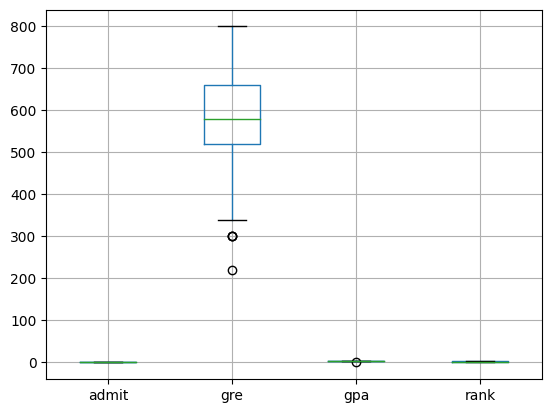

In [84]:
#df2.plot()
#df2["gre"].plot()
#df2.plot.bar()
#df2["gre"].plot.bar()
df2.boxplot()

In [90]:
# bostonhousing 읽어서 null 파악, 요약값 출력
bh = pd.read_csv("data/BostonHousing.csv")
bh.info()
bh.isnull().sum()
bh.describe().T
bh.medv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

NameError: name 'plt' is not defined

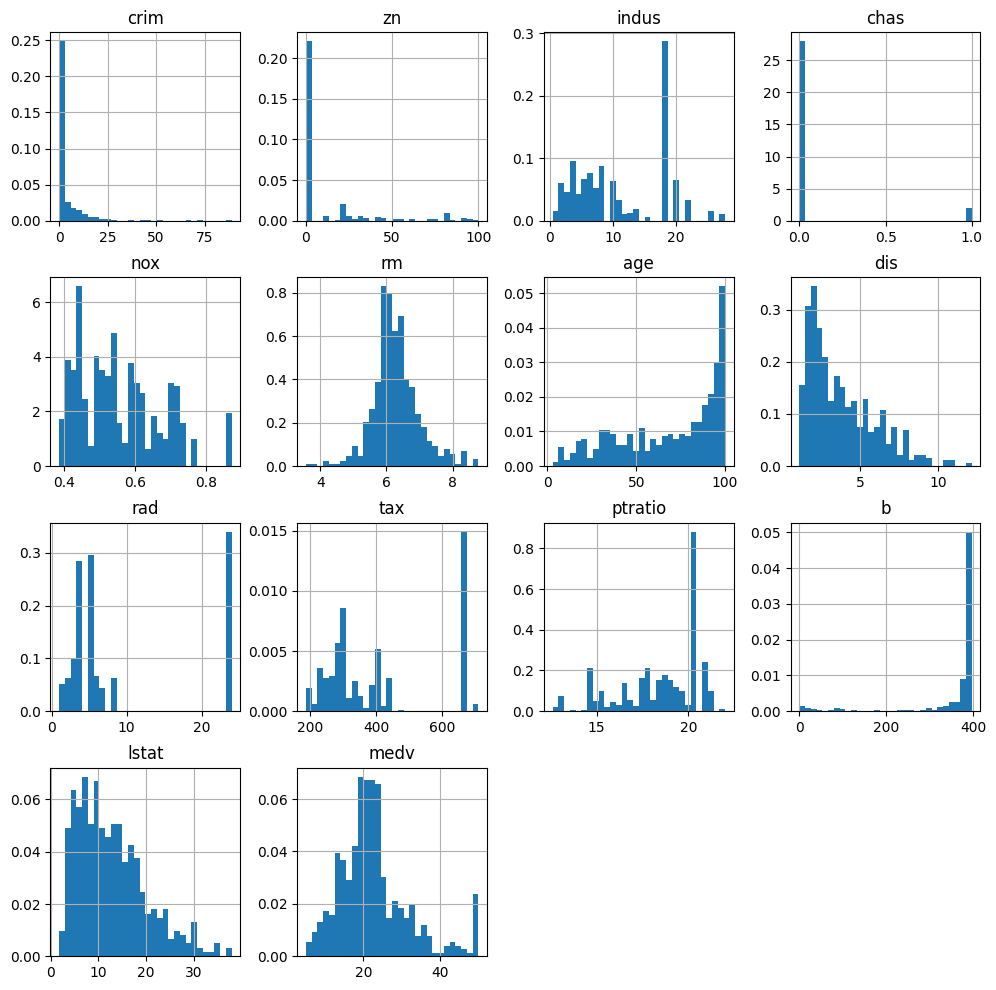

In [92]:
bh.hist(bins=30, figsize=(12,12), density=True)
# plt.show() # matplotlib 그림을 화면에 표시 

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


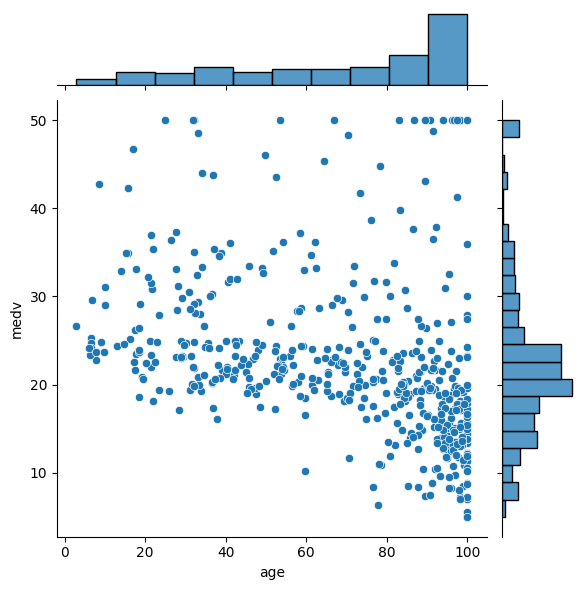

In [102]:
# sns.boxplot(bh)
#sns.boxenplot(y=bh["rm"])
#plt.title("rm")
join1 = sns.jointplot(x="age", y="medv", data=bh)



<Axes: >

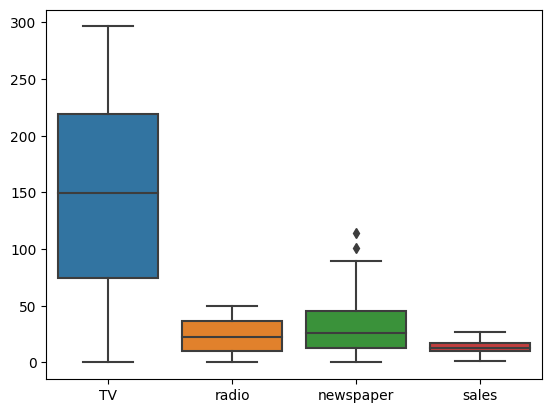

In [110]:
# seaborn을 이용하여 adv.csv 를 읽어서 tv, radio, news, sales 변수에 대한 boxplot
adv = pd.read_csv("data/adv.csv", index_col=0)
sns.boxplot(adv)
#sns.boxplot(y=adv["TV"])
# TV sales 에 대한 jointplot, radio, sales에 대한 jointplot

#jointplot 에 대한 jpg로 저장

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


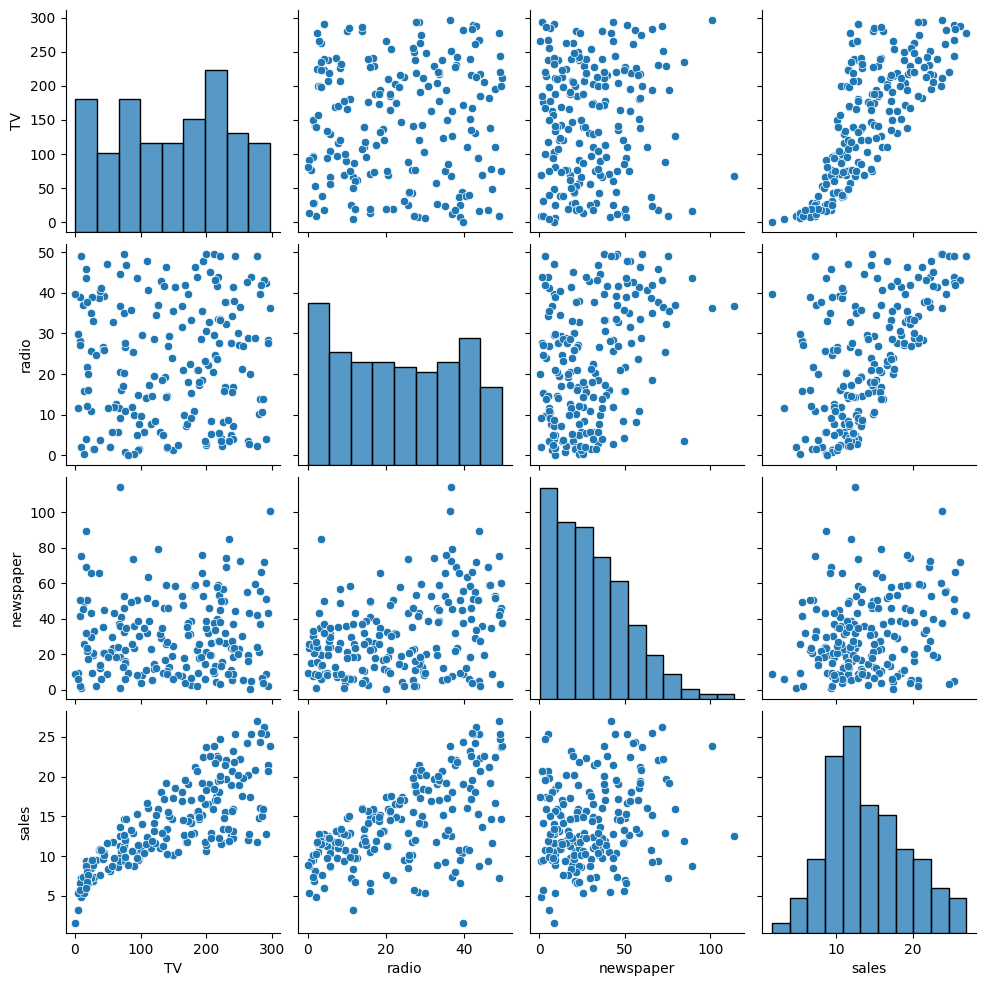

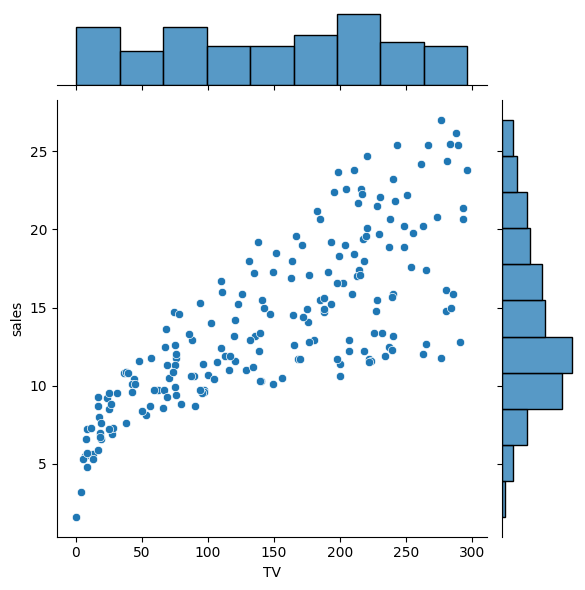

In [106]:
j1 = sns.jointplot(x="TV", y="sales", data=adv)
j1.savefig("data/TV_sales.jpg")

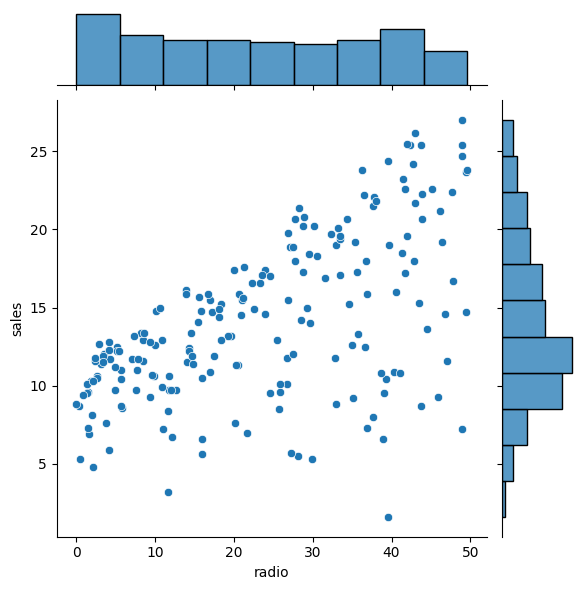

In [107]:
j2 = sns.jointplot(x="radio", y="sales", data=adv)
j2.savefig("data/radio_sales.jpg")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


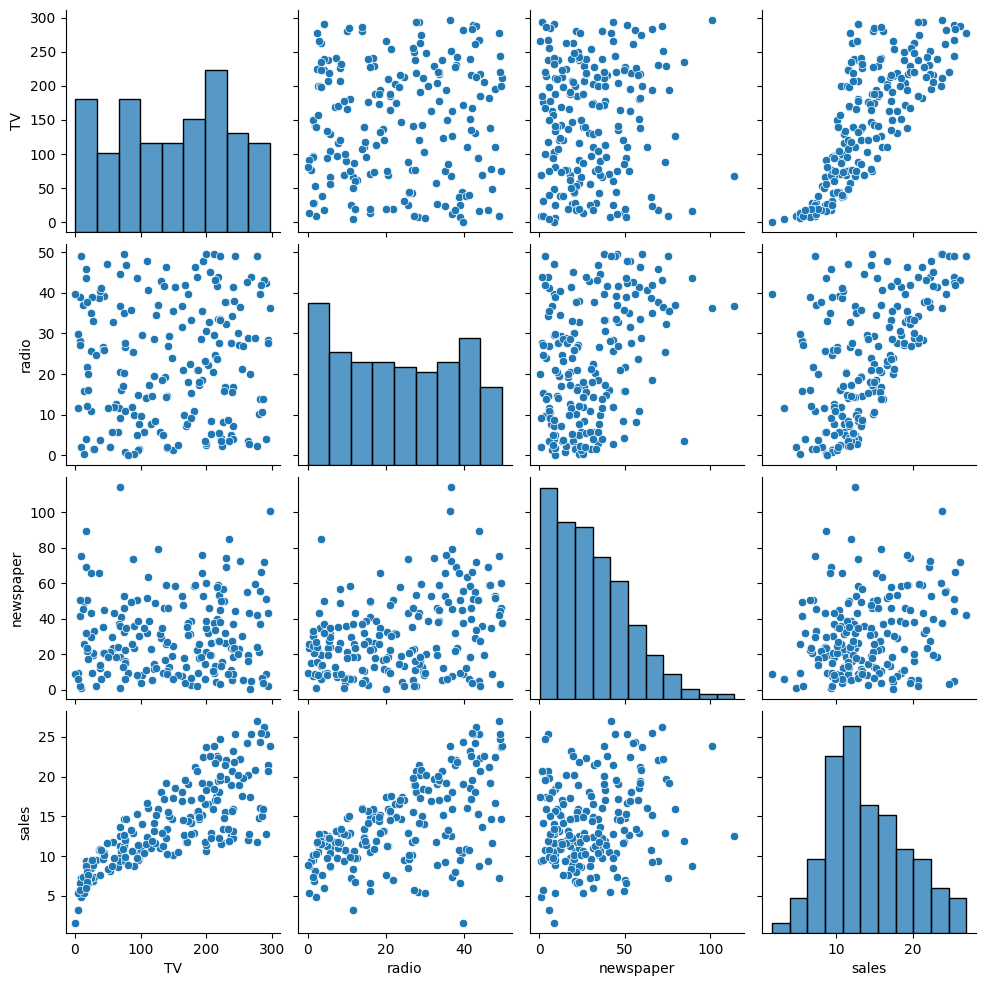

In [112]:
sns.pairplot(adv)

<Axes: >

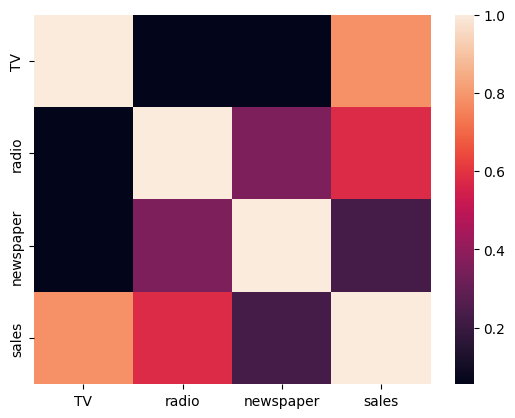

In [114]:
# corr 상관관계
# heatmap
sns.heatmap( adv.corr() )

요약값 = 통계량 
전체에서(population = 모집단) -> 요약값,    => parameter 모집단의 정보
일부를 추출(sample = 표본) -> 요약값(= 통계량 )

통계량 --inference(estimation)--> parameter

central tendency (집중화 경향) : 값이 어디에 있냐 ( 평균 mean, 중앙값 median )
disposal degree (산포도) : 중앙에서 부터 얼마나 떨어져 있나 (분산, 표준편차) 

평균 : outlier의 영향을 크게 받음 
중앙값 : 짝수인경우 가운데 2개의 평균을 냄, outlier에 영향을 덜 받음
분산 : 평균에서 떨어진 정도를 제곱해서 평균
표준편차 : 분산에 root
===== 한 변수에 대한 요약값 (기술 통계 (descriptive))

=== 두 변수에 대한 요약값 (= 직선적인 관계) ===
공분산 : co-variance 각 변수에 대해 중앙에서부터 떨어진 값
x             y
0    -5       0   -2    -5*-2 =10
5     0       2    0     0*0  = 0
10    5       4    2     5*2  = 10 
                         =========
                         20 (같은 방향으로 가면 +값으로 더 크게 )
                         
상관관계 (correlation) : 두변수 직선관계를 나타냄 -1 < cor < 1
                       공분산 / dx dy


In [116]:
adv.cov()   # 공분산
adv.corr()  # 상관관계

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [117]:
# creditset.csv 를 credits 라고 읽으세요
# clientid는 index_col 지정
# age, income, loan 세변수에 대한 공분산, 상관관계를 구해라
# 상관관계에 대해서 heatmap 그려보세요
# age, income, loan 에 대한 standard scaling 을 적용해서 공분산을 구해보세요

credits = pd.read_csv ("data/creditset.csv", index_col="clientid")




                age        income          loan
age      175.892573 -6.647007e+03  2.649963e+02
income -6647.007135  2.052436e+08  1.924571e+07
loan     264.996268  1.924571e+07  9.274522e+06
             age    income      loan
age     1.000000 -0.034984  0.006561
income -0.034984  1.000000  0.441117
loan    0.006561  0.441117  1.000000


<Axes: >

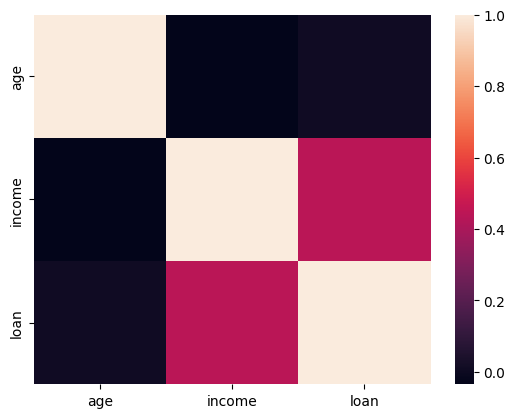

In [120]:
# age, income, loan 세변수에 대한 공분산, 상관관계를 구해라
print(credits[["age", "income", "loan"]].cov())
print(credits[["age", "income", "loan"]].corr())
sns.heatmap(credits[["age", "income", "loan"]].corr())

In [128]:
# age, income, loan 에 대한 standard scaling 을 적용해서 공분산을 구해보세요
sc = StandardScaler()
#sc.fit_transform(credits[["age","income","loan"]])
#pd.DataFrame(sc.fit_transform(credits[["age","income","loan"]]), columns=["age","income","loan"]).corr()
pd.DataFrame(sc.fit_transform(credits[["age","income","loan"]]), columns=["age","income","loan"]).cov()

# corr은 인과관계를 알려주진 않음

,age,income,loan
age,1.000500,-0.035001,0.006564
income,-0.035001,1.000500,0.441337
loan,0.006564,0.441337,1.000500


corr = 0.4 : h0 : corr = 0 (귀무가설, 기존)
             h1 : corr != 0


h0 이 참일 확률 p-value 

p-value < 5% : h1 이 크다 (기존 견해 기각)

p-value > 5% : h0 이 참이다

In [129]:
from scipy.stats import pearsonr

pearsonr (credits.income, credits.loan)
# p-value 약 0
# corr = 0 이라는 기존 견해를 기각, 통계적으로 유의하다, statistically significant

PearsonRResult(statistic=0.4411165041164958, pvalue=5.254081815675615e-96)

In [142]:
# binary.csv 읽어서 admit = 1 인 데이터만 찾으세요
# 그 데이터에서 gre, gpa 의 corr을 찾으세요
# 통계적으로 유의한지 보세요
bnr = pd.read_csv("data/binary.csv")
bnr2 = bnr[ bnr.admit == 1 ] 

pearsonr( bnr2.gre, bnr2.gpa )

# 0.4 < corr < 0.6 관계 있음 , corr > 0.7 강한 관계

PearsonRResult(statistic=0.23263883756694395, pvalue=0.008488404666214101)

In [156]:
#선형 회귀 분석 (y이 숫자인 모형)
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(bnr2.gpa.values.reshape(-1,1), bnr2.gre.values)
model.coef_ # 기울기, coefficient
model.intercept_ # y절편
# gre = 68*gpa + 380

# 0~1 점수, R-squared 결정계수
model.score(bnr2.gpa.values.reshape(-1,1), bnr2.gre.values)

# 예측 predict 
model.predict(X)

0.054120828744499194

In [162]:
X = bnr2.gpa.values.reshape(-1,1)
y = bnr2.gre.values
pred = model.predict (X)
np.mean( (y-pred)**2 ) # MSE
np.mean( (y-pred)**2 )**0.5 # RMSE

105.47968807164823

In [178]:
# X, y 를 파티셔닝 해서 X_train, X_test, y_train, y_test
# model의 fit을 X_train, y_train
# predict는 X_test
#mse 는 y_test와 비교 계산

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3)
#X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression().fit(X_train, y_train)
pred = model.predict(X_test)
np.mean ( (y_test-pred)**2) **0.5


127.00392670143171